In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
car_data = pd.read_excel('Almaty_vv.xlsx')

In [3]:
car_data.head()

,Unnamed: 0,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color
0,1,Алматы,Toyota,Avensis,4200000,2003,седан,2.0,бензин,автомат,200000,серебристый
1,3,Алматы,Mitsubishi,Delica,12500000,2006,микроавтобус,3.0,бензин,автомат,180000,серебристый
2,4,Алматы,Infiniti,QX80,28050000,2018,внедорожник,5.6,бензин,автомат,22000,белый
3,6,Алматы,Nissan,Patrol,11500000,2012,внедорожник,5.6,бензин,автомат,105000,белый
4,8,Алматы,ВАЗ,(Lada)\tLargus\tCross,4800000,2019,минивэн,1.6,бензин,механика,90000,черный


In [4]:
del car_data['Unnamed: 0']   #to delete Unnamed

In [5]:
car_data.head()

,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color
0,Алматы,Toyota,Avensis,4200000,2003,седан,2.0,бензин,автомат,200000,серебристый
1,Алматы,Mitsubishi,Delica,12500000,2006,микроавтобус,3.0,бензин,автомат,180000,серебристый
2,Алматы,Infiniti,QX80,28050000,2018,внедорожник,5.6,бензин,автомат,22000,белый
3,Алматы,Nissan,Patrol,11500000,2012,внедорожник,5.6,бензин,автомат,105000,белый
4,Алматы,ВАЗ,(Lada)\tLargus\tCross,4800000,2019,минивэн,1.6,бензин,механика,90000,черный


In [6]:
car_data.dropna(subset = ['Model'], inplace = True)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8660 entries, 0 to 8674
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         8660 non-null   object 
 1   Mark         8660 non-null   object 
 2   Model        8660 non-null   object 
 3   Price        8660 non-null   int64  
 4   Year         8660 non-null   int64  
 5   Body         8660 non-null   object 
 6   EngineSize   8660 non-null   float64
 7   FuelType     8660 non-null   object 
 8   GearboxType  8660 non-null   object 
 9   Mileage      8660 non-null   int64  
 10  Color        8660 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 811.9+ KB


In [7]:
car_data.shape

(8660, 11)

# Encoding objects

In [8]:
le = LabelEncoder()

In [9]:
for column in car_data.columns:
    if(car_data[column].dtype == 'object'):
        car_data[column] = le.fit_transform(car_data[column])

In [10]:
car_data

,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color
0,0,63,152,4200000,2003,11,2.0,0,0,200000,9
1,0,44,259,12500000,2006,6,3.0,0,0,180000,9
2,0,28,574,28050000,2018,0,5.6,0,0,22000,1
3,0,45,546,11500000,2012,0,5.6,0,0,105000,1
4,0,66,31,4800000,2019,8,1.6,0,2,90000,14
...,...,...,...,...,...,...,...,...,...,...,...
8670,0,66,20,2000000,2015,11,6.0,0,2,85000,1
8671,0,14,229,3300000,2009,11,3.5,0,0,73000,14
8672,0,14,487,2900000,2008,12,5.7,0,0,73000,14
8673,0,10,56,2900000,2009,11,3.5,0,0,72000,14


# DATA VISUALISATION

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

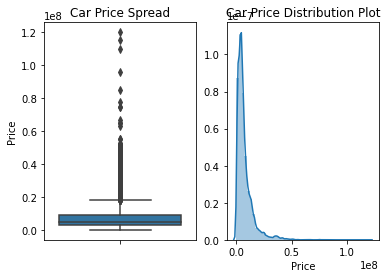

In [12]:
plt.subplot(1,2,1)
plt.title("Car Price Spread")
sns.boxplot(y=car_data.Price)

plt.subplot(1,2,2)
plt.title("Car Price Distribution Plot")
sns.distplot(car_data.Price)


plt.show()

Inference :

1.The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 0.5 * 1e8).

In [13]:
car_data2 = pd.read_excel('Almaty_vv.xlsx')

[Text(0, 0.5, 'Frequency of mark'), Text(0.5, 0, 'Car Mark')]

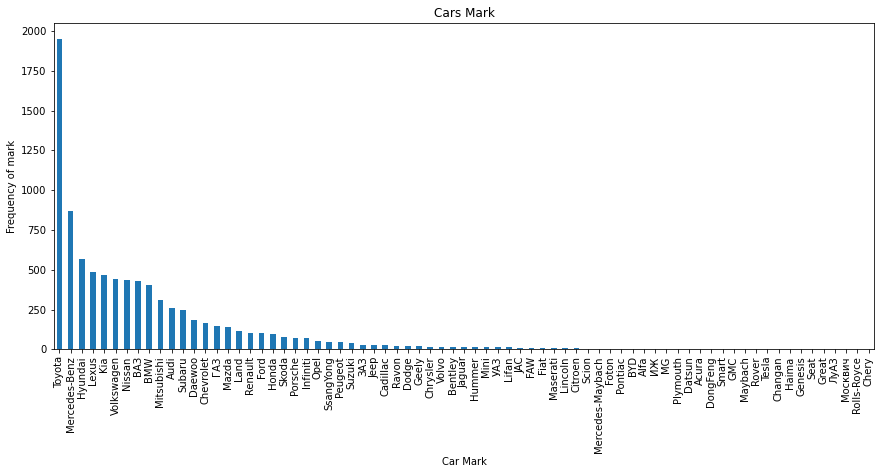

In [14]:
plt.figure(figsize=(50, 6))

plt.subplot(1,3,1)
plt1 = car_data2.Mark.value_counts().plot.bar()
plt.title('Cars Mark')
plt1.set(xlabel = 'Car Mark', ylabel='Frequency of mark')


Inference :

We see that Toyota seemed to be favored car company.

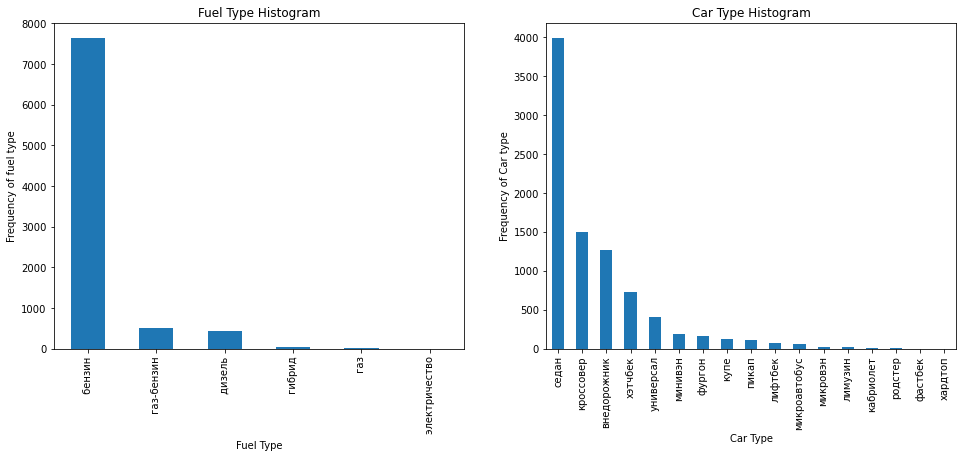

In [15]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,2)
plt1 = car_data2.FuelType.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = car_data2.Body.value_counts().plot.bar()
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Number of Benzin fueled cars are more than other fuel type.

Sedan is the top car type prefered.

In [16]:
y=car_data.Price
X=car_data[['Mark','Model', 'Year', 'EngineSize', 'FuelType', 'Body', 'GearboxType', 'Mileage', 'Color']]
np.isnan(X.values.any())

#Z = data[['City', 'Mark', 'Model','Year', 'GearboxType', 'Mileage', 'EngineSize','FuelType', 'Color']]

False

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 365)

In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [19]:
y_pred=regressor.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8315636060029487

In [21]:

predicted = regressor.predict(X_test)
X_test['actual_price']=y_test
X_test['predictions']=predicted

X_test['Body']=car_data2['Body']
X_test['FuelType']=car_data2['FuelType']
X_test['GearboxType']=car_data2['GearboxType']
X_test['Color']=car_data2['Color']
X_test['Mark']=car_data2['Mark']
X_test['Model']=car_data2['Model']
X_test.head()

<ipython-input-21-18944bedb45f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['actual_price']=y_test
<ipython-input-21-18944bedb45f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predictions']=predicted
<ipython-input-21-18944bedb45f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,Body,EngineSize,FuelType,Year,Mileage,GearboxType,Mark,Model,Color,actual_price,predictions
2527,кроссовер,2.0,бензин,2014,59000,автомат,Land,Rover\tFreelander,синий,9700000,13990000.0
6141,седан,1.6,бензин,2011,137500,автомат,Toyota,Corolla,белый,5400000,6225000.0
5268,хэтчбек,1.8,бензин,1997,240000,механика,Volkswagen,Golf,синий,1700000,1835000.0
7910,кроссовер,3.6,бензин,2007,265983,автомат,Subaru,Tribeca,белый,5250000,5919000.0
3182,седан,1.5,бензин,2013,190000,механика,Daewoo,Nexia,белый,1640000,1763000.0


In [56]:
car_data2

,Unnamed: 0,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color
0,1,Алматы,Toyota,Avensis,4200000,2003,седан,2.0,бензин,автомат,200000,серебристый
1,3,Алматы,Mitsubishi,Delica,12500000,2006,микроавтобус,3.0,бензин,автомат,180000,серебристый
2,4,Алматы,Infiniti,QX80,28050000,2018,внедорожник,5.6,бензин,автомат,22000,белый
3,6,Алматы,Nissan,Patrol,11500000,2012,внедорожник,5.6,бензин,автомат,105000,белый
4,8,Алматы,ВАЗ,(Lada)\tLargus\tCross,4800000,2019,минивэн,1.6,бензин,механика,90000,черный
...,...,...,...,...,...,...,...,...,...,...,...,...
8670,18828,Алматы,ВАЗ,(Lada)\t2170\t(седан),2000000,2015,седан,6.0,бензин,механика,85000,белый
8671,18829,Алматы,Dodge,Charger,3300000,2009,седан,3.5,бензин,автомат,73000,черный
8672,18831,Алматы,Dodge,Magnum,2900000,2008,универсал,5.7,бензин,автомат,73000,черный
8673,18832,Алматы,Chrysler,300C,2900000,2009,седан,3.5,бензин,автомат,72000,черный


# XGBOOST

In [22]:
y_xg=car_data.Price
X_xg=car_data[['Mark','Model', 'Year', 'EngineSize', 'FuelType', 'Body', 'GearboxType', 'Mileage', 'Color']]
np.isnan(X.values.any())

#Z = data[['City', 'Mark', 'Model','Year', 'GearboxType', 'Mileage', 'EngineSize','FuelType', 'Color']]

False

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_xg, y_xg, test_size = 0.2, random_state = 365)

In [24]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)
y_pred_xgb = xgb.predict(X_test)

#r_squared = r2_score(y_test,y_pred_xgb)
#rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
#print("R_squared :",r_squared)
#print("RMSE :",rmse)

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_xgb)

0.9031754676787723

In [46]:
car_data

,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color
0,0,63,152,4200000,2003,11,2.0,0,0,200000,9
1,0,44,259,12500000,2006,6,3.0,0,0,180000,9
2,0,28,574,28050000,2018,0,5.6,0,0,22000,1
3,0,45,546,11500000,2012,0,5.6,0,0,105000,1
4,0,66,31,4800000,2019,8,1.6,0,2,90000,14
...,...,...,...,...,...,...,...,...,...,...,...
8670,0,66,20,2000000,2015,11,6.0,0,2,85000,1
8671,0,14,229,3300000,2009,11,3.5,0,0,73000,14
8672,0,14,487,2900000,2008,12,5.7,0,0,73000,14
8673,0,10,56,2900000,2009,11,3.5,0,0,72000,14


In [26]:

predicted_xgb = xgb.predict(X_test)
X_test['actual_price']=y_test
X_test['predictions']=predicted_xgb

X_test['Body']=car_data2['Body']
X_test['FuelType']=car_data2['FuelType']
X_test['GearboxType']=car_data2['GearboxType']
X_test['Color']=car_data2['Color']
X_test['Mark']=car_data2['Mark']
X_test['Model']=car_data2['Model']
X_test.head()

<ipython-input-26-e95679f51b4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['actual_price']=y_test
<ipython-input-26-e95679f51b4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predictions']=predicted_xgb
<ipython-input-26-e95679f51b4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,1.464440e+07
6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.460000e+06
5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,1.817381e+06
7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,5.880989e+06
3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,1.612158e+06


# KNN

In [30]:
y_knn=car_data.Price
X_knn=car_data[['Mark','Model', 'Year', 'EngineSize', 'FuelType', 'Body', 'GearboxType', 'Mileage', 'Color']]
np.isnan(X.values.any())

False

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size = 0.2, random_state = 365)

In [32]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_knn)

0.24200554077381542

In [34]:
predicted_knn = knn.predict(X_test)
X_test['actual_price']=y_test
X_test['predictions']=predicted_knn

X_test['Body']=car_data2['Body']
X_test['FuelType']=car_data2['FuelType']
X_test['GearboxType']=car_data2['GearboxType']
X_test['Color']=car_data2['Color']
X_test['Mark']=car_data2['Mark']
X_test['Model']=car_data2['Model']
X_test.head()

<ipython-input-34-53e9c7c906a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['actual_price']=y_test
<ipython-input-34-53e9c7c906a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predictions']=predicted_knn
<ipython-input-34-53e9c7c906a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,1.645000e+07
6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,4.870000e+06
5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,5.735714e+06
7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,3.398571e+06
3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,5.321429e+06


# LASSO

In [35]:
y_lasso=car_data.Price
X_lasso=car_data[['Mark','Model', 'Year', 'EngineSize', 'FuelType', 'Body', 'GearboxType', 'Mileage', 'Color']]
np.isnan(X.values.any())

False

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size = 0.2, random_state = 365)

In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lso = Lasso(alpha=1.0)
lso.fit(X_train, y_train)
y_pred_lso = lso.predict(X_test)


r_squared = r2_score(y_test,y_pred_lso)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lso))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.5567774786106191
RMSE : 5142146.405951067


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lso)

0.5567774786106191

In [41]:
predicted_lso = lso.predict(X_test)
X_test['actual_price']=y_test
X_test['predictions']=predicted_lso

X_test['Body']=car_data2['Body']
X_test['FuelType']=car_data2['FuelType']
X_test['GearboxType']=car_data2['GearboxType']
X_test['Color']=car_data2['Color']
X_test['Mark']=car_data2['Mark']
X_test['Model']=car_data2['Model']
X_test.head()

<ipython-input-41-6da9d766f698>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['actual_price']=y_test
<ipython-input-41-6da9d766f698>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predictions']=predicted_lso
<ipython-input-41-6da9d766f698>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,9.728732e+06
6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.078285e+06
5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,-1.114986e+06
7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,1.045664e+07
3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,4.823512e+06


# Ridge

In [42]:
y_ridge=car_data.Price
X_ridge=car_data[['Mark','Model', 'Year', 'EngineSize', 'FuelType', 'Body', 'GearboxType', 'Mileage', 'Color']]
np.isnan(X.values.any())

False

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ridge, y_ridge, test_size = 0.2, random_state = 365)

In [45]:
from sklearn.linear_model import Ridge

rdg=Ridge(alpha=1.0)
rdg.fit(X_train,y_train)

y_pred_rdg=rdg.predict(X_test)

r_squared = r2_score(y_test,y_pred_rdg)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rdg))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.5567716056233141
RMSE : 5142180.474234


In [46]:
predicted_rdg = rdg.predict(X_test)
X_test['actual_price']=y_test
X_test['predictions']=predicted_rdg

X_test['Body']=car_data2['Body']
X_test['FuelType']=car_data2['FuelType']
X_test['GearboxType']=car_data2['GearboxType']
X_test['Color']=car_data2['Color']
X_test['Mark']=car_data2['Mark']
X_test['Model']=car_data2['Model']
X_test.head()

<ipython-input-46-1985d2a3d9b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['actual_price']=y_test
<ipython-input-46-1985d2a3d9b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predictions']=predicted_rdg
<ipython-input-46-1985d2a3d9b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,9.729345e+06
6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.078495e+06
5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,-1.114896e+06
7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,1.045640e+07
3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,4.823826e+06


# Linear Regression

In [47]:
y_lr=car_data.Price
X_lr=car_data[['Mark','Model', 'Year', 'EngineSize', 'FuelType', 'Body', 'GearboxType', 'Mileage', 'Color']]
np.isnan(X.values.any())

False

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size = 0.2, random_state = 365)

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(X_train,y_train)

# Model Summary
y_pred_lr = lr.predict(X_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.5567774964386283
RMSE : 5142146.302533223


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr)

0.5567774964386283

In [51]:
predicted_lr = lr.predict(X_test)
X_test['actual_price']=y_test
X_test['predictions']=predicted_lr

X_test['Body']=car_data2['Body']
X_test['FuelType']=car_data2['FuelType']
X_test['GearboxType']=car_data2['GearboxType']
X_test['Color']=car_data2['Color']
X_test['Mark']=car_data2['Mark']
X_test['Model']=car_data2['Model']
X_test.head()

<ipython-input-51-3046fb043b19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['actual_price']=y_test
<ipython-input-51-3046fb043b19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predictions']=predicted_lr
<ipython-input-51-3046fb043b19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Mark,Model,Year,EngineSize,FuelType,Body,GearboxType,Mileage,Color,actual_price,predictions
2527,Land,Rover\tFreelander,2014,2.0,бензин,кроссовер,автомат,59000,синий,9700000,9.728731e+06
6141,Toyota,Corolla,2011,1.6,бензин,седан,автомат,137500,белый,5400000,5.078285e+06
5268,Volkswagen,Golf,1997,1.8,бензин,хэтчбек,механика,240000,синий,1700000,-1.114986e+06
7910,Subaru,Tribeca,2007,3.6,бензин,кроссовер,автомат,265983,белый,5250000,1.045664e+07
3182,Daewoo,Nexia,2013,1.5,бензин,седан,механика,190000,белый,1640000,4.823511e+06
